In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier


In [9]:
matches_df = pd.read_csv('../Datasets/final_feature_dataset.csv')
matches_df.head()
# matches_df.columns
# matches_df.shape

,Season,Home Team,Away Team,Home Goals,Away Goals,Home Team ELO,Away Team ELO,Home XG,Away XG,Home XGA,Away XGA,Home Win Percentage,Home Draw Percentage,Away Win Percentage,Away Draw Percentage,Home Team Form,Away Team Form,Home Team Cumulative Points,Away Team Cumulative Points,Winner
0,2014-2015,Manchester Utd,Swansea City,1,2,1676,1521,54.21,33.84,40.90,55.94,64.50,20.64,29.82,28.95,0.0,0.0,0,0,-1
1,2014-2015,West Brom,Sunderland,2,2,1485,1520,38.63,37.45,53.75,51.46,24.01,26.97,26.52,25.10,0.0,0.0,0,0,0
2,2014-2015,Leicester City,Everton,2,2,1462,1692,48.21,44.89,56.39,46.18,27.27,29.22,36.44,28.54,0.0,0.0,0,0,0
3,2014-2015,West Ham,Tottenham,0,1,1509,1680,46.69,57.40,52.39,57.04,32.51,25.29,39.62,25.83,0.0,0.0,0,0,-1
4,2014-2015,QPR,Hull City,0,1,1420,1434,45.73,65.26,32.79,46.99,30.42,24.58,21.05,26.32,0.0,0.0,0,0,-1


In [10]:
X = matches_df.drop(["Winner","Season",'Home Goals','Away Goals',"Home Team","Away Team"], axis=1)
y = matches_df["Winner"]

# categorical_columns = ["Home Team", "Away Team"]
# numerical_columns = [col for col in X.columns if col not in categorical_columns]

label_mapping = {-1: 0, 0: 1, 1: 2}
y_mapped = y.map(label_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

In [11]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10)

c:\Users\vimal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4354 - loss: 1.0786 - val_accuracy: 0.4684 - val_loss: 1.0431
Epoch 2/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.4446 - loss: 1.0583 - val_accuracy: 0.4684 - val_loss: 1.0362
Epoch 3/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4422 - loss: 1.0508 - val_accuracy: 0.4684 - val_loss: 1.0242
Epoch 4/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4382 - loss: 1.0438 - val_accuracy: 0.4684 - val_loss: 1.0150
Epoch 5/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4607 - loss: 1.0312 - val_accuracy: 0.4882 - val_loss: 1.0030
Epoch 6/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5128 - loss: 1.0253 - val_accuracy: 0.5671 - val_loss: 0.9931
Epoch 7/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5364 - loss: 1.0193 - val_accuracy: 0.5684 - val_loss: 0.9831
Epoch 8/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5287 - loss: 1.0114 

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7006 - loss: 0.6837 
Test Loss: 0.7275810837745667
Test Accuracy: 0.6736842393875122
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


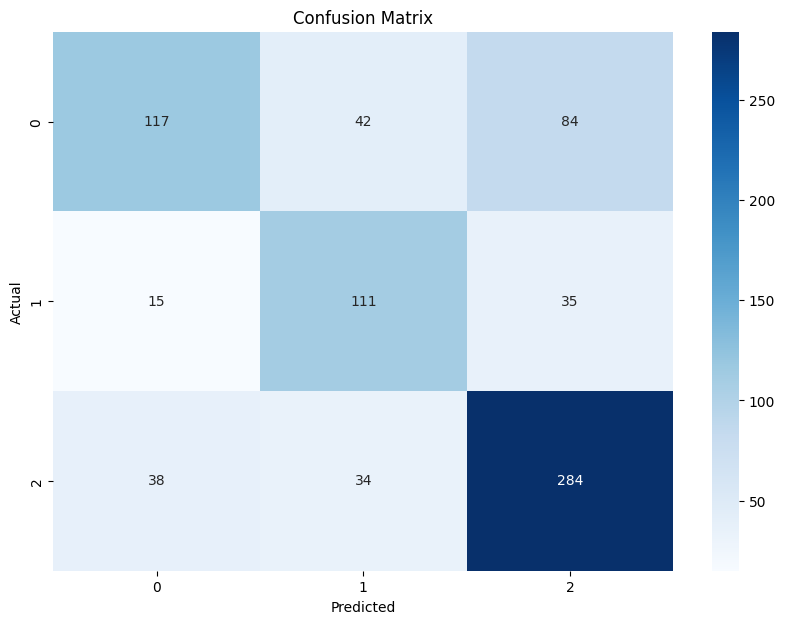

              precision    recall  f1-score   support

        Draw       0.69      0.48      0.57       243
    Home Win       0.59      0.69      0.64       161
    Away Win       0.70      0.80      0.75       356

    accuracy                           0.67       760
   macro avg       0.66      0.66      0.65       760
weighted avg       0.68      0.67      0.67       760

Class: Draw, Accuracy: 0.6882352941176471
Class: Home Win, Accuracy: 0.5935828877005348
Class: Away Win, Accuracy: 0.7047146401985112
Class: macro avg, Accuracy: 0.6621776073388976
Class: weighted avg, Accuracy: 0.6759032017119004


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report_dict = classification_report(y_test, y_pred_classes, target_names=['Draw', 'Home Win', 'Away Win'], output_dict=True)
for label, metrics in report_dict.items():
    if isinstance(metrics, dict):
        print(f"Class: {label}, Accuracy: {metrics['precision']}")

In [13]:
# def create_model(optimizer='adam', activation='sigmoid'):
#     model = Sequential([
#         Dense(128, input_dim=X_train.shape[1], activation=activation),
#         Dense(64, activation=activation),
#         Dense(32, activation=activation),
#         Dense(3, activation='softmax')
#     ])
#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=64, verbose=0)


In [14]:
# param_grid = {
#     'optimizer': ['Adam'],
#     'epochs': [1000],
#     'batch_size': [64]
# }

# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

# print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")